# Exploring Data

In [1]:
import pandas as pd
import re
import string
import nltk
import profanity_filter

In [60]:
df = pd.read_csv("final_data.csv",low_memory = False)

In [61]:
len(df)

1126324

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126324 entries, 0 to 1126323
Data columns (total 47 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1126324 non-null  int64  
 1   Unnamed: 0.1      1126324 non-null  int64  
 2   Unnamed: 0.1.1    1126324 non-null  int64  
 3   id                1126324 non-null  int64  
 4   conversation_id   1126324 non-null  int64  
 5   created_at        1126324 non-null  object 
 6   date              1126324 non-null  object 
 7   time              680784 non-null   object 
 8   timezone          1126324 non-null  int64  
 9   user_id           1126324 non-null  int64  
 10  username          1126324 non-null  object 
 11  name              1126208 non-null  object 
 12  place             2116 non-null     object 
 13  tweet             1126324 non-null  object 
 14  language          1126324 non-null  object 
 15  mentions          680784 non-null   object 
 16  

In [62]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,conversation_id,created_at,date,time,timezone,user_id,...,trans_src,trans_dest,Unnamed: 0.1.1.1,user_id_str,day,hour,nlikes,nreplies,nretweets,search
0,0,0,0,1104399088915607552,1104399088915607552,2019-03-09 17:10:36 Egypt Standard Time,2019-03-09,17:10:36,200,843195118924546048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0,1116703024783736833,1116703024783736833,2019-04-12 16:02:03 Egypt Standard Time,2019-04-12,16:02:03,200,34048082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,0,1119316001844289536,1119316001844289536,2019-04-19 21:05:05 Egypt Standard Time,2019-04-19,21:05:05,200,107684382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,0,1113496393015005184,1113496393015005184,2019-04-03 19:40:02 Egypt Standard Time,2019-04-03,19:40:02,200,34048082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,0,1115986055268794373,1115986055268794373,2019-04-10 16:33:04 Egypt Standard Time,2019-04-10,16:33:04,200,34048082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df["language"]

0          en
1          en
2          en
3          en
4          en
           ..
1126319    fr
1126320    fr
1126321    fr
1126322    fr
1126323    fr
Name: language, Length: 1126324, dtype: object

    Select the English language tweets only

In [8]:
len(df[df["language"]!="en"])

423006

In [63]:
df = df[df["language"]=="en"]

In [64]:
len(df)

703318

In [11]:
len(df[df["date"]<="2019-11-30"])

77683

In [63]:
df["hashtags"]

0                                       []
1          ['troxell', 'txla19', 'edtech']
2                   ['bardbits', 'prompt']
3                           ['advantage7']
4          ['txla19', 'troxell', 'edtech']
                        ...               
1125933                                 []
1125984                                 []
1125999                                 []
1126294                                 []
1126314                                 []
Name: hashtags, Length: 703318, dtype: object

In [ ]:
print(fuck_tweets.loc[343].tweet)

# Dropping unneeded columns

    We only chose the columns we will need and ignore the rest

In [76]:
imp_df = df[["tweet","username","date","hashtags"]]

In [77]:
imp_df.head()

,tweet,username,date,hashtags
0,"https://t.co/23WtwZ02H8 ""The Artful Covid -- ...",best_of_mltshp,2019-03-09,[]
1,We lived in a “connected” world. Classrooms to...,bluum_edtech,2019-04-12,"['troxell', 'txla19', 'edtech']"
2,"Stones cascade~ Form their own soliloquy, Covi...",demonwings17,2019-04-19,"['bardbits', 'prompt']"
3,The new Covid HDBaseT Smart System is an all-i...,bluum_edtech,2019-04-03,['advantage7']
4,Going to #TXLA19? Visit #Troxell booth 2317. S...,bluum_edtech,2019-04-10,"['txla19', 'troxell', 'edtech']"


# Clean the tweets

    Here we need to remove all the punctuation from the tweets, however, if we remove the "@" we will not be able to identify mentions
    So we left it there and will remove the mentions completely in a further step

In [59]:
punc = []
for char in string.punctuation[0]:
    if char != "@":
        punc.append(char)
punc = "".join(punc)

In [68]:
def remove_punctuation(tweet):
    global punc
    tweet = "".join([char for char in tweet if char not in punc])
    return tweet

In [69]:
def remove_mentions(tweet):
    tweet = " ".join(word for word in tweet.split() if word[0] != "@")
    return tweet

In [70]:
def cleanhttp(sentence):
    sentence = re.sub("(https?://[^\s]+)","",sentence)
    return sentence


In [71]:
def cleanHtml(sentence): #tweets may unclude html content, so this regex removes anything between the html brackets "<>"
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


In [48]:
def cleanPunc(sentence): #removes all the punctuation from the sentence
    cleaned = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|_|-]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

In [73]:
def keepAlpha(sentence): #This removes any numbers, non ascii letter and leaves only alphabet chars
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [49]:
def decontraction(text): # clears teh abbreviations such as isn't => is not
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    return text

    apply all the above functions to the tweets

In [78]:
imp_df['clean_tweet'] = imp_df['tweet'].str.lower()
imp_df['clean_tweet'] = imp_df['clean_tweet'].apply(remove_mentions)
imp_df['clean_tweet'] = imp_df['clean_tweet'].apply(cleanhttp)
imp_df['clean_tweet'] = imp_df['clean_tweet'].apply(cleanHtml)
imp_df['clean_tweet'] = imp_df['clean_tweet'].apply(remove_punctuation)
imp_df['clean_tweet'] = imp_df['clean_tweet'].apply(keepAlpha)
imp_df['clean_tweet'] = imp_df['clean_tweet'].apply(decontraction)

C:\Users\George\AppData\Local\Temp/ipykernel_17772/3707538082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_df['clean_tweet'] = imp_df['tweet'].str.lower()
C:\Users\George\AppData\Local\Temp/ipykernel_17772/3707538082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_df['clean_tweet'] = imp_df['clean_tweet'].apply(remove_mentions)
C:\Users\George\AppData\Local\Temp/ipykernel_17772/3707538082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [79]:
imp_df.head()

,tweet,username,date,hashtags,clean_tweet
0,"https://t.co/23WtwZ02H8 ""The Artful Covid -- ...",best_of_mltshp,2019-03-09,[],the artful covid false knees via
1,We lived in a “connected” world. Classrooms to...,bluum_edtech,2019-04-12,"['troxell', 'txla19', 'edtech']",we lived in a connected world classrooms tod...
2,"Stones cascade~ Form their own soliloquy, Covi...",demonwings17,2019-04-19,"['bardbits', 'prompt']",stones cascade form their own soliloquy covidc...
3,The new Covid HDBaseT Smart System is an all-i...,bluum_edtech,2019-04-03,['advantage7'],the new covid hdbaset smart system is an allin...
4,Going to #TXLA19? Visit #Troxell booth 2317. S...,bluum_edtech,2019-04-10,"['txla19', 'troxell', 'edtech']",going to txla visit troxell booth see our t...


    Rearrange the columns

In [80]:
clean_df = imp_df[["username","tweet","clean_tweet","hashtags","date"]]

In [81]:
clean_df.head()

,username,tweet,clean_tweet,hashtags,date
0,best_of_mltshp,"https://t.co/23WtwZ02H8 ""The Artful Covid -- ...",the artful covid false knees via,[],2019-03-09
1,bluum_edtech,We lived in a “connected” world. Classrooms to...,we lived in a connected world classrooms tod...,"['troxell', 'txla19', 'edtech']",2019-04-12
2,demonwings17,"Stones cascade~ Form their own soliloquy, Covi...",stones cascade form their own soliloquy covidc...,"['bardbits', 'prompt']",2019-04-19
3,bluum_edtech,The new Covid HDBaseT Smart System is an all-i...,the new covid hdbaset smart system is an allin...,['advantage7'],2019-04-03
4,bluum_edtech,Going to #TXLA19? Visit #Troxell booth 2317. S...,going to txla visit troxell booth see our t...,"['txla19', 'troxell', 'edtech']",2019-04-10


    Remove the original tweet since we have the clean tweet

In [82]:
clean_df.drop(["tweet"],axis=1,inplace=True)

C:\Users\George\.conda\envs\myenv\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
clean_df.to_csv("cleaned_data.csv")

## Removing stopping words and explicit language

In [86]:
stopping = list(set(stopping))

In [50]:
def remove_stopping_words(tweet): # stopping words are skipped and the original tweet is returned without those stopping words
    global stopping
    return " ".join([x for x in tweet.split() if x not in stopping])


In [88]:
with open("untitled.txt","r") as swears:
    data = swears.readlines()

In [89]:
swears = []
for word in data:
    swears.append(word.replace("\n","")) # lines in a file ends with the "\n" character so we remove it


In [322]:
clean_df = pd.read_csv("cleaned_data.csv")

In [323]:
clean_df.drop("Unnamed: 0", axis = 1)

,username,clean_tweet,hashtags,date
0,best_of_mltshp,the artful covid false knees via robotmachine,[],2019-03-09
1,bluum_edtech,we lived in a connected world classrooms tod...,"['troxell', 'txla19', 'edtech']",2019-04-12
2,demonwings17,stones cascade form their own soliloquy covidc...,"['bardbits', 'prompt']",2019-04-19
3,bluum_edtech,the new covid hdbaset smart system is an allin...,['advantage7'],2019-04-03
4,bluum_edtech,going to txla visit troxell booth see our t...,"['txla19', 'troxell', 'edtech']",2019-04-10
...,...,...,...,...
703313,JimRuocco,from the desk of jim r take broadwaynational...,[],2022-04-09 08:29:08
703314,cvaudel,dsdault chrismartenson hi deb my uncle didn t ...,[],2022-04-09 08:06:25
703315,feeronique,corinnereverbel vaccin kinder ou vaccin buitoni,[],2022-04-09 07:59:11
703316,julielajoie13,vaccin is a great tool against covid and dos...,[],2022-04-09 02:39:18


In [90]:
len(swears)

835

In [101]:
len(clean_df[clean_df["swears_count"]>0])

57207

    As seen above, nearly 5% of the tweets contains profanity, so removing them is needed as they might appear in statistics and graphs later on
    HOWEVER, swears play an important role when it comes to sentiment analysis. so we remove them from the tweet and add a new column to count them

In [94]:
def count_profanity_words(sentence):
    global swears
    counter =0
    for word in sentence.split():
        if word in swears:
            counter +=1
    return counter

def filter_profanity_words(sentence):
    global swears
    clean_sentence = []
    for word in sentence.split():
        if word not in swears:
            clean_sentence.append(word)
    return " ".join(clean_sentence)

In [321]:
print(filter_profanity_words("hello worlds"))

hello worlds


In [100]:
clean_df["swears_count"] = clean_df["clean_tweet"].fillna("").apply(count_profanity_words)
clean_df["clean_tweet"] = clean_df["clean_tweet"].fillna("").apply(filter_profanity_words)


In [272]:
regex_string =re.compile( r"\b(" + "|".join(swears) + ")\\W",re.I)
def remove_profanity(sentence):
    global regex_string
    return regex_string.sub("swearing", sentence)

In [329]:
stop_words = list(set(stopwords.words('english')))

re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

the following line will replace all the swears with a specific word, since I don't want to remove them as they contribute to the sentiment analysis

In [102]:
clean_df.head()






,username,clean_tweet,hashtags,date,swears_count
0,best_of_mltshp,the artful covid false knees via,[],2019-03-09,0
1,bluum_edtech,we lived in a connected world classrooms today...,"['troxell', 'txla19', 'edtech']",2019-04-12,0
2,demonwings17,stones cascade form their own soliloquy covidc...,"['bardbits', 'prompt']",2019-04-19,0
3,bluum_edtech,the new covid hdbaset smart system is an allin...,['advantage7'],2019-04-03,0
4,bluum_edtech,going to txla visit troxell booth see our team...,"['txla19', 'troxell', 'edtech']",2019-04-10,0


In [85]:
stopping = nltk.corpus.stopwords.words("english")


In [103]:
clean_df["clean_tweet"] = clean_df["clean_tweet"].fillna("").apply(remove_stopping_words)

In [104]:
clean_df.head()

,username,clean_tweet,hashtags,date,swears_count
0,best_of_mltshp,artful covid false knees via,[],2019-03-09,0
1,bluum_edtech,lived connected world classrooms today incredi...,"['troxell', 'txla19', 'edtech']",2019-04-12,0
2,demonwings17,stones cascade form soliloquy covidcrow shriek...,"['bardbits', 'prompt']",2019-04-19,0
3,bluum_edtech,new covid hdbaset smart system allinone av con...,['advantage7'],2019-04-03,0
4,bluum_edtech,going txla visit troxell booth see team austin...,"['txla19', 'troxell', 'edtech']",2019-04-10,0


## Stemming

In [2]:
from nltk.stem.snowball import SnowballStemmer

In [333]:
stemmer = SnowballStemmer("english")

In [334]:
def stem_tweets(tweet): #stemming will remove the prefix and suffix of the words so we end up with the root, this helps in grouping the words together
    stemmer = SnowballStemmer("english")
    words = tweet.split()
    stemmed = []
    for word in words:
        if word == "swearing":
            stemmed.append(word)
        else:
            stemmed.append(stemmer.stem(word))
    return " ".join(stemmed)

In [335]:
clean_df["clean_tweet"] = clean_df["clean_tweet"].fillna("").apply(stem_tweets)

In [336]:
clean_df.head()

,Unnamed: 0,username,clean_tweet,hashtags,date,swears_count
0,0,best_of_mltshp,art covid fals knee via robotmachin,[],2019-03-09,0
1,1,bluum_edtech,live connect world classroom today incred tech...,"['troxell', 'txla19', 'edtech']",2019-04-12,0
2,2,demonwings17,stone cascad form soliloquy covidcrow shriek f...,"['bardbits', 'prompt']",2019-04-19,0
3,3,bluum_edtech,new covid hdbaset smart system allinon av cont...,['advantage7'],2019-04-03,0
4,4,bluum_edtech,go txla visit troxel booth see team austin con...,"['txla19', 'troxell', 'edtech']",2019-04-10,0


In [337]:
clean_df.to_csv("cleaned_data.csv")

# Sentiment Analysis

In [315]:
len(clean_df[clean_df["swears_count"] >0])

57405

In [2]:
clean_df = pd.read_csv("cleaned_data.csv")

In [3]:
clean_df.head()

,Unnamed: 0,Unnamed: 0.1,username,clean_tweet,hashtags,date,swears_count
0,0,0,best_of_mltshp,art covid fals knee via robotmachin,[],2019-03-09,0
1,1,1,bluum_edtech,live connect world classroom today incred tech...,"['troxell', 'txla19', 'edtech']",2019-04-12,0
2,2,2,demonwings17,stone cascad form soliloquy covidcrow shriek f...,"['bardbits', 'prompt']",2019-04-19,0
3,3,3,bluum_edtech,new covid hdbaset smart system allinon av cont...,['advantage7'],2019-04-03,0
4,4,4,bluum_edtech,go txla visit troxel booth see team austin con...,"['txla19', 'troxell', 'edtech']",2019-04-10,0


In [5]:
clean_df.drop(["Unnamed: 0","Unnamed: 0.1"],axis = 1,inplace = True)

    We need to sentiment analysis the tweets that talk about Covid, since the sentiment analysis is about Covid specifically not health awareness in General!

In [6]:
def find_covid(sentence):
    for word in sentence.split():
        if "covid" in word:
            return True
    return False

In [ ]:
clean_df["include_covid"] = clean_df.clean_tweet.fillna("").apply(find_covid) # we flag the tweets with "covid" word so we can filter them

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [112]:
covid_tweets = clean_df[clean_df["include_covid"] == True] # filter those tweets to another DF

    We analyze each tweet,add the factor of the swears, decide whether (positive/negative/neutral), and then add it to the respective df

In [142]:
positive = negative = 0
neutral_tweets =[]
positive_tweets =[]
negative_tweets = []
tweets_list = covid_tweets.clean_tweet.values
swears_count_list = covid_tweets.swears_count.values
for i in range(0,len(covid_tweets)):
    tweet = tweets_list[i]
    sentiment = SentimentIntensityAnalyzer().polarity_scores(tweet)
    negative = sentiment["neg"] + (0.1*swears_count_list[i])
    positive = sentiment["pos"]
    if positive > negative:
        positive_tweets.append(tweet)
    elif positive < negative:
        negative_tweets.append(tweet)
    else:
        neutral_tweets.append(tweet)

    Here are the count of each category:

In [143]:
print(len(negative_tweets),len(positive_tweets),len(neutral_tweets))


201190 197504 99105
True


In [144]:
neutral_df = pd.DataFrame(neutral_tweets)
positive_df = pd.DataFrame(positive_tweets)
negative_df = pd.DataFrame(negative_tweets)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

    Create a pie chart to represent the distribution of the tweets

In [162]:
data = [len(neutral_df),len(positive_df),len(negative_df)]
labels = [f"neutral tweets: {round(float(len(neutral_df))/float(len(tweets_list)),3)}%",
          f"positive tweets: {round(float(len(positive_df))/float(len(tweets_list)),3)}%",
          f"negative tweets: {round(float(len(negative_df))/float(len(tweets_list)),3)}%"]

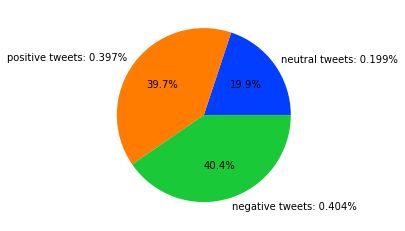

In [175]:
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = sns.color_palette("bright"), autopct='%0.1f%%')
plt.show()

In [5]:
positive_df = pd.read_csv("positive_tweets.csv")
negative_df = pd.read_csv("negative_tweets.csv")
neutral_df = pd.read_csv("neutral_tweets.csv")

In [10]:
positive_df.head()

,0
0,lived connected world classrooms today incredi...
1,stones cascade form soliloquy covidcrow shriek...
2,new covid hdbaset smart system allinone av con...
3,going txla visit troxell booth see team austin...
4,love covids iridescence lt lt


In [17]:
from wordcloud import WordCloud,STOPWORDS

    Since wordcloud need a continuous string not a column in the DF, we will join all the tweets of each df into a gigantic string

In [37]:
positive_data = " ".join(positive_df["0"])
negative_data = " ".join(negative_df["0"])
neutral_data = " ".join(neutral_df["0"])


Add the stopping words to prevent them from showing up in the wordcloud, EX: we used covid to find these tweets, so all of them include covid. However, covid is not a helpful word to include in the word cloud

In [30]:
stoppingwords = list(set(STOPWORDS))
stoppingwords.extend(["vaccine","covid","tested"])

In [38]:
# positive_cloud = WordCloud(width=3000,height=3000,background_color="white",stopwords=stoppingwords).generate(data)
negative_cloud = WordCloud(width=3000,height=3000,background_color="white",stopwords=stoppingwords).generate(negative_data)
neutral_cloud = WordCloud(width=3000,height=3000,background_color="white",stopwords=stoppingwords).generate(neutral_data)

In [41]:
clouds = [positive_cloud,negative_cloud,neutral_cloud]

In [42]:
clouds

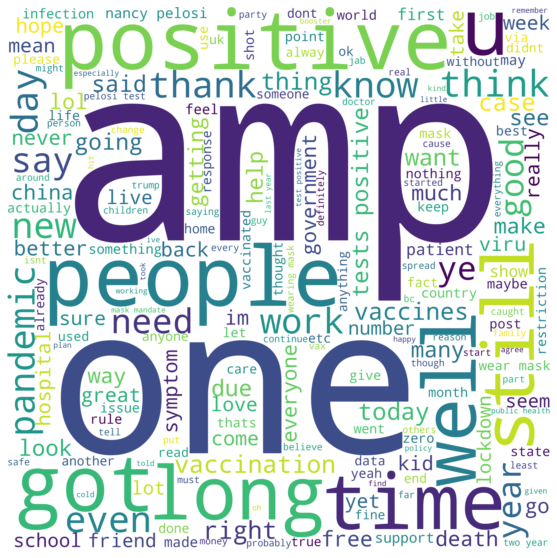

In [35]:
plt.figure(figsize=(15,10))
plt.imshow(positive_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

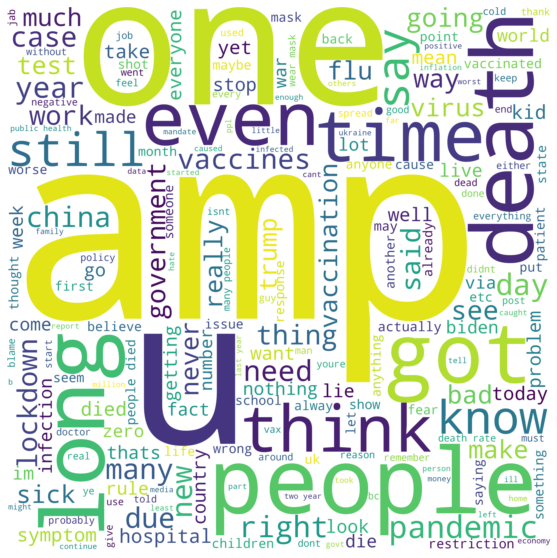

In [39]:
plt.figure(figsize=(15,10))
plt.imshow(negative_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

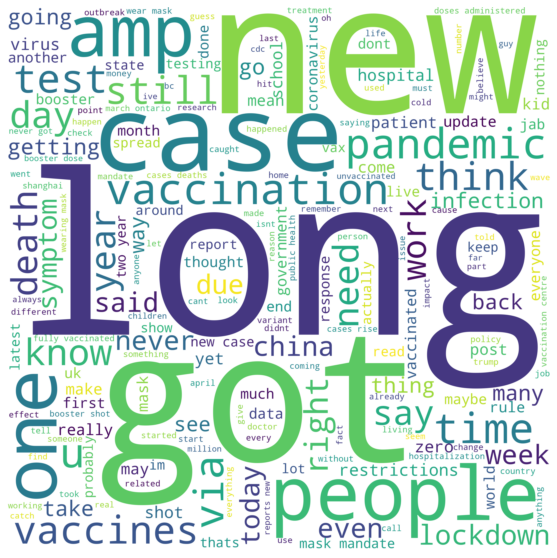

In [40]:
plt.figure(figsize=(15,10))
plt.imshow(neutral_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

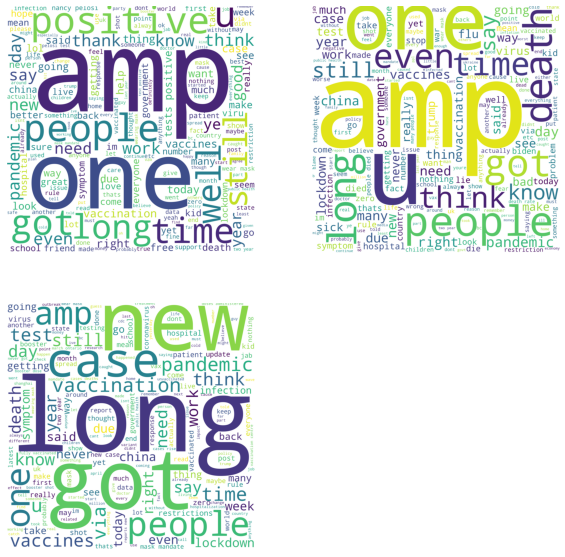

In [47]:
fig = plt.figure(figsize=(10,10))
for i in range(3):
    ax = fig.add_subplot(2,2,i+1)
    ax.imshow(clouds[i])
    ax.axis('off')